# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://www.kaggle.com/c/titanic/data) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd

❓ Run `!ls -lh` to list files in the current folder. You should see a `.csv` file.

In [3]:
!ls -lh

total 188K
-rw-r--r-- 1 florent florent 2.0K Oct 12 15:17 README.md
-rw-r--r-- 1 florent florent  60K Oct 20 09:21 reboot_e.ipynb
-rw-r--r-- 1 florent florent  61K Oct 20 07:20 reboot.ipynb
-rw-r--r-- 1 florent florent  60K Oct 12 15:17 titanic.csv


❓ Load the CSV data as a into a `titanic_df` variable.

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [4]:
titanic_df = pd.read_csv('titanic.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [7]:
titanic_df.drop('Cabin', axis=1, inplace=True)

## Classes Analysis

Let's have a look at the ticket repartition.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [12]:
pclass_df = titanic_df.groupby("Pclass").count()["PassengerId"].to_frame(name="count")
pclass_df

,count
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built at the previous question as a barchart

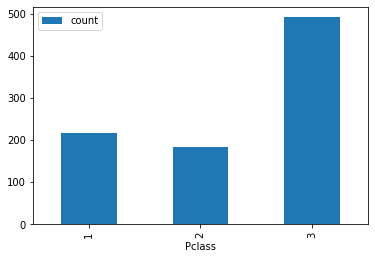

In [8]:
pclass_df.plot(kind="bar")

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

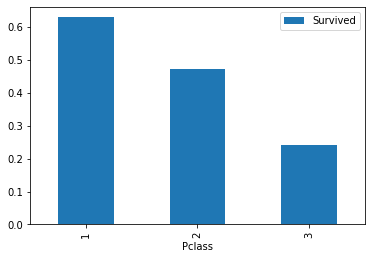

In [9]:
titanic_df[["Pclass","Survived"]].groupby('Pclass').mean().plot(kind='bar')

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [10]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

<AxesSubplot:xlabel='Sex'>

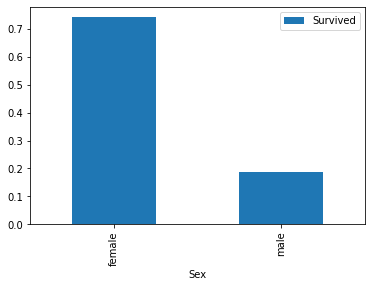

In [15]:
titanic_df[['Survived', 'Sex']].groupby('Sex').mean().plot(kind='bar')

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [17]:
survivors_df = titanic_df[['Survived', 'Sex']].groupby('Sex').sum()
survivors_df

,Survived
Sex,
female,233
male,109


In [19]:
survivors_df['Total'] = titanic_df[['Survived', 'Sex']].groupby('Sex').count()
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577


In [25]:
survivors_df.index

Index(['female', 'male'], dtype='object', name='Sex')

<AxesSubplot:xlabel='Sex'>

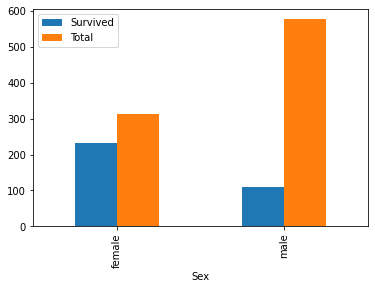

In [20]:
survivors_df.plot(kind='bar')

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [13]:
children_df = titanic_df[titanic_df['Age'] <= 17]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ How many children were there in the Titanic?

In [14]:
children_df.shape[0]

113

❓ How many children survived?

In [15]:
children_df['Survived'].sum()

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [16]:
survivors_df.loc['children'] = [children_df['Survived'].sum(), children_df.shape[0]]
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


In [17]:
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()
children_gender_df['Total'] = children_df[['Survived', 'Sex']].groupby('Sex').count()
children_gender_df.loc['children'] = [ 0, 0 ]
children_gender_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


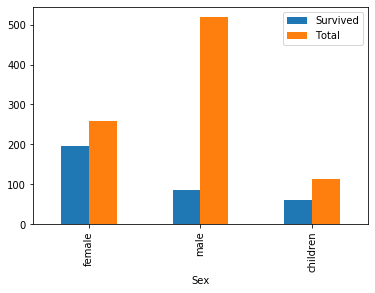

In [18]:
(survivors_df - children_gender_df).plot(kind='bar')